#  1. Pemilihan Dataset & Explore Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()


,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [ ]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

,0
ad_id,0
reporting_start,0
reporting_end,0
campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest1,0
interest2,0
interest3,0


>>
Dari total 1.143 baris, 382 baris tidak memiliki informasi tentang konversi (baik total maupun yang disetujui).



>> Visualisasi Awal

Text(0.5, 1.0, 'Distribusi Jumlah Tayangan (Impressions)')

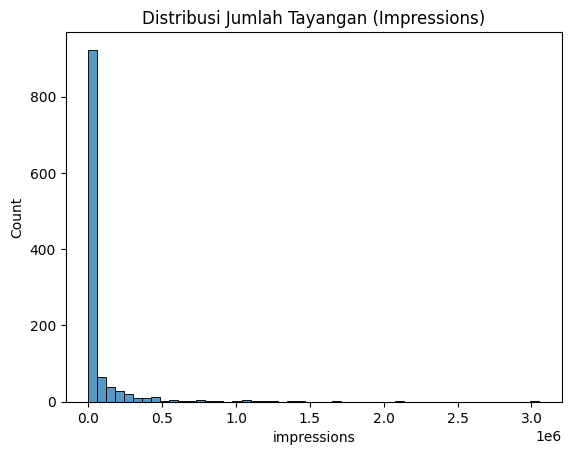

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi impresi
sns.histplot(df['impressions'], bins=50)
plt.title("Distribusi Jumlah Tayangan (Impressions)")



>>

*   Distribusi sangat tidak merata atau right-skewed
*   Mayoritas iklan memiliki impressions sangat rendah






# 2. Data Understanding & Penentuan Goals

>**Goals** :
Menganalisis efektivitas iklan digital berdasarkan metrik performa dan segmentasi demografi (usia, gender, interest) untuk membantu perusahaan mengalokasikan anggaran iklan secara lebih efisien.

In [ ]:
# 1. Cek dimensi dataset
print("Jumlah baris & kolom:", df.shape)

# 2. Struktur kolom
df.info()

# 3. Statistik deskriptif
df.describe()

# 4. Cek nilai kosong
print("\nNilai Kosong per Kolom:")
print(df.isnull().sum())

# 5. Contoh 5 baris pertama
df.head()


Jumlah baris & kolom: (1143, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: fl

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


### Penjelasan Dataset

Dataset ini berisi informasi mengenai performa kampanye iklan digital, terutama dari platform Facebook Ads. Setiap baris mewakili satu kombinasi iklan + demografi target + waktu tayang.

Jumlah data:
- Total baris: 1.143
- Total kolom: 15

#### Kolom dan Deskripsi:
- `ad_id`: ID unik iklan
- `reporting_start`, `reporting_end`: Tanggal tayang iklan
- `campaign_id`, `fb_campaign_id`: ID kampanye
- `age`, `gender`: Target demografi
- `interest1`, `interest2`, `interest3`: Kode interest target
- `impressions`: Jumlah tayangan iklan
- `clicks`: Jumlah klik
- `spent`: Biaya iklan
- `total_conversion`: Semua aksi konversi
- `approved_conversion`: Konversi yang disetujui

#### Catatan Penting:
- Kolom `total_conversion` dan `approved_conversion` memiliki 382 nilai kosong, akan ditangani pada tahap cleaning.
- Tipe data pada `reporting_start` dan `reporting_end` masih berupa string (`object`) dan akan dikonversi ke datetime.



# 3. Data Cleaning

In [ ]:
# Penanganan Missing Value (Nilai Kosong)

df['total_conversion'] = df['total_conversion'].fillna(0)
df['approved_conversion'] = df['approved_conversion'].fillna(0)



In [ ]:
# Cek kembali apakah masih ada nilai kosong
print(df[['total_conversion', 'approved_conversion']].isnull().sum())

# Tampilkan beberapa baris untuk memastikan hasil
df[['total_conversion', 'approved_conversion']].head()

total_conversion       0
approved_conversion    0
dtype: int64


,total_conversion,approved_conversion
0,2.0,1.0
1,2.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,1.0


In [ ]:
# Konversi tipe data tanggal
df['reporting_start'] = pd.to_datetime(df['reporting_start'], dayfirst=True)
df['reporting_end'] = pd.to_datetime(df['reporting_end'], dayfirst=True)


In [ ]:
# Cek dan hapus duplikat
print("Jumlah duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Jumlah duplikat: 0


In [ ]:
# Cek Outlier
Q1 = df['spent'].quantile(0.25)
Q3 = df['spent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_spent = df[(df['spent'] < lower_bound) | (df['spent'] > upper_bound)]
print(f"Jumlah Outlier pada Kolom 'spent': {outliers_spent.shape[0]}")


Jumlah Outlier pada Kolom 'spent': 194


Data Cleaning

Pada Data Cleaning langkah yang dilakukan adalah:

1. **Penanganan Missing Value**  
   Kolom `total_conversion` dan `approved_conversion` memiliki 382 nilai kosong. Nilai ini diisi dengan 0 karena merepresentasikan tidak terjadi konversi pada baris tersebut.

2. **Konversi Tipe Data**  
   Kolom `reporting_start` dan `reporting_end` diubah ke format datetime agar dapat digunakan untuk analisis waktu.

3. **Pemeriksaan Duplikat**  
   Dataset diperiksa untuk baris duplikat dan dihapus jika ditemukan.

4. **Deteksi Outlier**  
   Outlier pada kolom `spent` dideteksi menggunakan metode IQR. Ditemukan 194 outlier yang tidak dihapus karena merepresentasikan kampanye iklan dengan anggaran tinggi yang penting untuk dianalisis lebih lanjut.

Kesimpulan: Dataset sudah bersih dan siap dianalisis.


# 4. Data Manipulation

In [ ]:
# Modifikasi untuk membuat metrik performa iklan
df['CTR'] = df['clicks'] / (df['impressions'] )
df['CPC'] = df['spent'] / (df['clicks'])
df['CPA'] = df['spent'] / (df['approved_conversion'])

# Kombinasi segmentasi demografi
df['age_gender'] = df['age'] + ' - ' + df['gender']

import numpy as np
df['log_spent'] = np.log1p(df['spent'])

# Label high spender
Q3 = df['spent'].quantile(0.75)
IQR = Q3 - df['spent'].quantile(0.25)
upper_bound = Q3 + 1.5 * IQR
df['high_spender'] = df['spent'] > upper_bound

df.head()




,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,...,total_conversion,approved_conversion,CTR,CPC,CPA,age_gender,log_spent,high_spender,age_num,age_group
0,708746,17/08/2017,17/08/2017,916.0,103916.0,30-34,M,15,17,17,...,20,10,0.000014,1.430000e+09,142999994.8,30-34 - M,21.080940,False,32,Muda
1,708749,17/08/2017,17/08/2017,916.0,103917.0,30-34,M,16,19,21,...,20,0,0.000011,9.100000e+08,inf,30-34 - M,21.322102,False,32,Muda
2,708771,17/08/2017,17/08/2017,916.0,103920.0,30-34,M,20,25,22,...,10,0,0.000000,NaN,NaN,30-34 - M,0.000000,False,32,Muda
3,708815,30/08/2017,30/08/2017,916.0,103928.0,30-34,M,28,32,32,...,10,0,0.000023,1.250000e+02,inf,30-34 - M,4.836282,False,32,Muda
4,708818,17/08/2017,17/08/2017,916.0,103928.0,30-34,M,28,33,32,...,10,10,0.000024,1.290000e+09,128999996.2,30-34 - M,20.977908,False,32,Muda


In [ ]:
# Konversi nilai age campuran ke median angka
def parse_age(age_val):
    if '-' in str(age_val):
        parts = age_val.split('-')
        return (int(parts[0]) + int(parts[1])) // 2
    else:
        try:
            return int(age_val)
        except:
            return None

df['age_num'] = df['age'].apply(parse_age)

# Buat kategori umur
def age_grouping(age):
    if age <= 17:
        return 'Anak'
    elif 18 <= age <= 34:
        return 'Muda'
    elif 35 <= age <= 54:
        return 'Dewasa'
    elif 55 <= age <= 74:
        return 'Lansia Muda'
    else:
        return 'Lansia'

df['age_group'] = df['age_num'].apply(age_grouping)

#  Gabungkan dengan gender
df['age_group_gender'] = df['age_group'] + ' - ' + df['gender']

# Tampilkan hasil konversi dan kategorisasi
df[['age', 'age_num', 'age_group', 'age_group_gender']].drop_duplicates().sort_values(by='age_num')


,age,age_num,age_group,age_group_gender
822,2,2,Anak,Anak - F
893,2,2,Anak,Anak - M
897,7,7,Anak,Anak - M
945,7,7,Anak,Anak - F
901,10,10,Anak,Anak - M
...,...,...,...,...
1127,112,112,Lansia,Lansia - F
1057,113,113,Lansia,Lansia - M
1141,113,113,Lansia,Lansia - F
1128,114,114,Lansia,Lansia - F


In [ ]:
# Hapus kolom age_group_gender sesuai permintaan
df.drop(columns=['age_group_gender'], inplace=True)

# Konfirmasi kolom sudah dihapus
'age_group_gender' not in df.columns

True

In [ ]:
df.head(10)

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,...,approved_conversion,CTR,CPC,CPA,age_gender,log_spent,high_spender,age_num,age_group,age_group_gender
0,708746,17/08/2017,17/08/2017,916.0,103916.0,30-34,M,15,17,17,...,10,0.000014,1.430000e+09,142999994.8,30-34 - M,21.080940,False,32,Muda,Muda - M
1,708749,17/08/2017,17/08/2017,916.0,103917.0,30-34,M,16,19,21,...,0,0.000011,9.100000e+08,inf,30-34 - M,21.322102,False,32,Muda,Muda - M
2,708771,17/08/2017,17/08/2017,916.0,103920.0,30-34,M,20,25,22,...,0,0.000000,NaN,NaN,30-34 - M,0.000000,False,32,Muda,Muda - M
3,708815,30/08/2017,30/08/2017,916.0,103928.0,30-34,M,28,32,32,...,0,0.000023,1.250000e+02,inf,30-34 - M,4.836282,False,32,Muda,Muda - M
4,708818,17/08/2017,17/08/2017,916.0,103928.0,30-34,M,28,33,32,...,10,0.000024,1.290000e+09,128999996.2,30-34 - M,20.977908,False,32,Muda,Muda - M
5,708820,17/08/2017,17/08/2017,916.0,103929.0,30-34,M,29,30,30,...,10,0.000000,NaN,0.0,30-34 - M,0.000000,False,32,Muda,Muda - M
6,708889,17/08/2017,17/08/2017,916.0,103940.0,30-34,M,15,16,17,...,0,0.000019,1.590000e+09,inf,30-34 - M,22.285612,False,32,Muda,Muda - M
7,708895,17/08/2017,17/08/2017,916.0,103941.0,30-34,M,16,20,18,...,10,0.000009,1.270000e+09,126999998.1,30-34 - M,20.962283,False,32,Muda,Muda - M
8,708953,17/08/2017,17/08/2017,916.0,103951.0,30-34,M,27,31,31,...,0,0.000042,1.500000e+01,inf,30-34 - M,2.772589,False,32,Muda,Muda - M
9,708958,30/08/2017,30/08/2017,916.0,103952.0,30-34,M,28,32,31,...,0,0.000032,1.053333e+09,inf,30-34 - M,21.873838,False,32,Muda,Muda - M


Data Manipulation

1. **Perhitungan Metrik Performa**  
   Ditambahkan 3 kolom metrik utama:
   - `CTR` (Click-Through Rate) = `clicks / impressions`
   - `CPC` (Cost Per Click) = `spent / clicks`
   - `CPA` (Cost Per Acquisition) = `spent / approved_conversion`



2. **Deteksi High Spender**  
   - Ditandai kampanye dengan biaya melebihi Q3 + 1.5×IQR sebagai `high_spender = True`

3. **Normalisasi Kolom Umur**  
   - Kolom `age` memiliki format campuran (`'30–34'`, `'25'`, `'114'`, dll). Dibuat kolom baru `age_num` yang merepresentasikan umur dalam angka.
   - Berdasarkan `age_num`, dibuat kolom `age_group` yang dikategorikan sebagai:
     - `Anak` (≤17)
     - `Muda` (18–34)
     - `Dewasa` (35–54)
     - `Lansia Muda` (55–74)
     - `Lansia` (≥75)



# 5. Exploratory Data Analysis

/tmp/ipython-input-25-1420528001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='CTR', data=df, estimator=np.mean, palette='Blues_d')


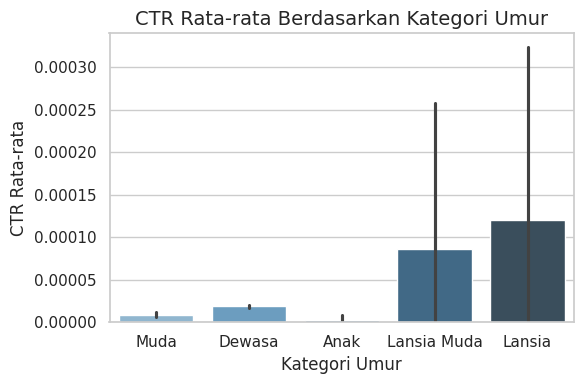

/tmp/ipython-input-25-1420528001.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='CPC', data=df, estimator=np.mean, palette='Oranges')


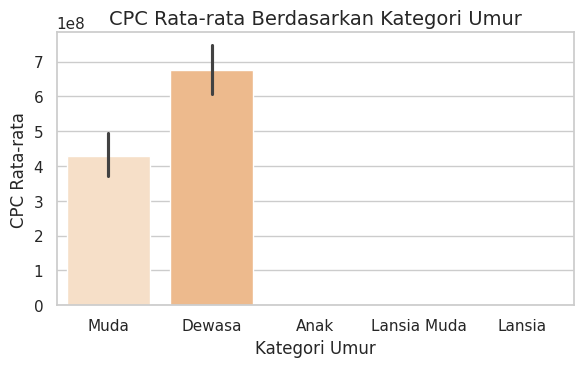

In [ ]:
# VISUALISASI

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# 1. Barplot CTR rata-rata berdasarkan age_group
plt.figure(figsize=(6, 4))
sns.barplot(x='age_group', y='CTR', data=df, estimator=np.mean, palette='Blues_d')
plt.title('CTR Rata-rata Berdasarkan Kategori Umur', fontsize=14)
plt.xlabel('Kategori Umur', fontsize=12)
plt.ylabel('CTR Rata-rata', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Barplot CPC rata-rata berdasarkan age_group
plt.figure(figsize=(6, 4))
sns.barplot(x='age_group', y='CPC', data=df, estimator=np.mean, palette='Oranges')
plt.title('CPC Rata-rata Berdasarkan Kategori Umur', fontsize=14)
plt.xlabel('Kategori Umur', fontsize=12)
plt.ylabel('CPC Rata-rata', fontsize=12)
plt.tight_layout()
plt.show()




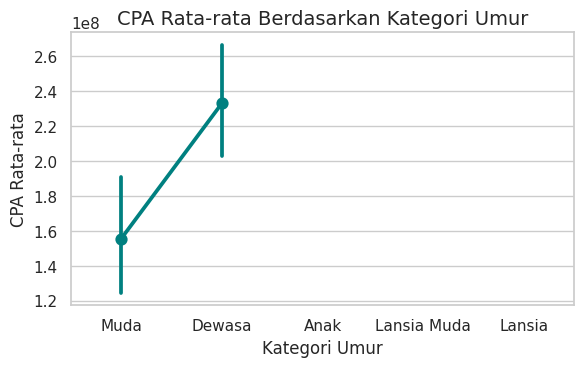

In [ ]:
#3. Pointplot CPA rata-rata berdasarkan kategori umur
plt.figure(figsize=(6, 4))z
sns.pointplot(x='age_group', y='CPA', data=df, estimator=np.mean, color='teal')
plt.title('CPA Rata-rata Berdasarkan Kategori Umur', fontsize=14)
plt.xlabel('Kategori Umur', fontsize=12)
plt.ylabel('CPA Rata-rata', fontsize=12)
plt.tight_layout()
plt.show()